In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [6]:
fname_img = './valid_001_V00.im'
fname_seg = './valid_001_V00.seg'

**Plot some successive slices from the morphological image**

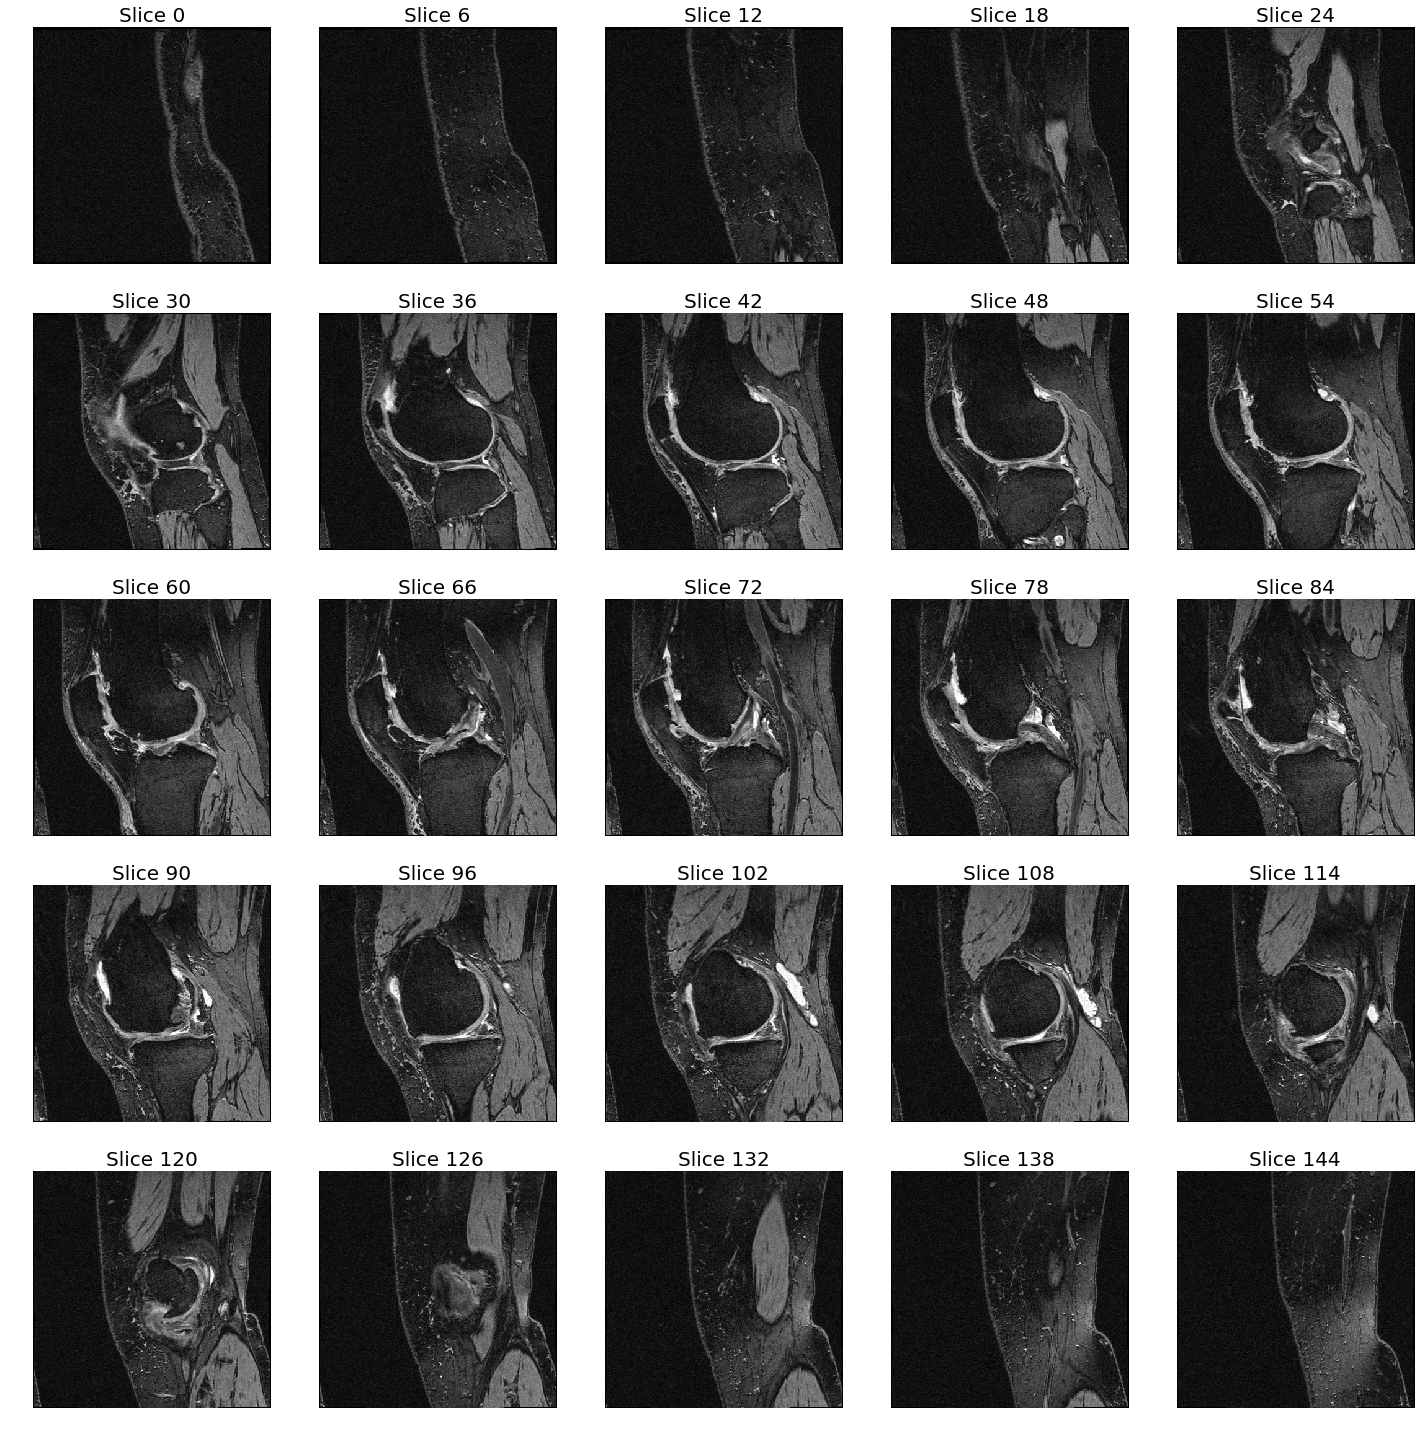

In [48]:
with h5py.File(fname_img,'r') as hf:
    img = np.array(hf['data'])

num_subplots = 5
plt.subplots(num_subplots, num_subplots, figsize = (num_subplots*4, num_subplots*4))

for cnt, slnum in enumerate(range(0,img.shape[-1],img.shape[-1]//num_subplots**2)):

    if cnt < num_subplots**2:
    
        plt.subplot(num_subplots, num_subplots, cnt+1)
        plt.imshow(img[...,slnum], vmin = 0, vmax = 0.005, cmap = 'gray')
        plt.title('Slice {}'.format(slnum), fontsize= 20)
        plt.axis('off')
    
plt.tight_layout()
plt.show()

**Plot a mean of all six segmentations provided in this dataset**

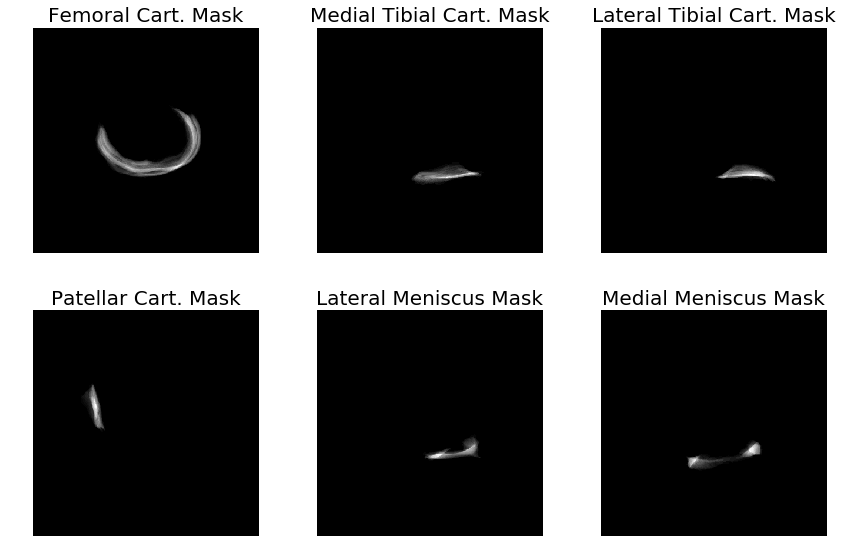

In [58]:
fig_captions = ['Femoral Cart.', 'Medial Tibial Cart.', 'Lateral Tibial Cart.', 'Patellar Cart.', 'Lateral Meniscus', 'Medial Meniscus']

with h5py.File(fname_seg,'r') as hf:
    seg = np.array(hf['data'])
    
nrows = 2
ncols = 3
seg_sums = np.mean(seg, 2)
plt.subplots(nrows, ncols, figsize = (ncols*4, nrows*4))

for cnt, tis_num in enumerate(range(0,6)):
    plt.subplot(nrows, ncols, cnt+1)
    plt.imshow(seg_sums[...,tis_num], cmap = 'gray')
    plt.title('{} Mask'.format(fig_captions[cnt]), fontsize = 20)
    plt.axis('off')
    
plt.tight_layout()
plt.show()

**Print out dimensions of dataset**

In [49]:
print('Size of the image file is {}'.format(img.shape))
print('Size of the mask file is {}'.format(seg.shape))

Size of the image file is (384, 384, 160)
Size of the mask file is (384, 384, 160, 6)
